# Data Augmentation

In [1]:
!pip install opencv-python
!pip install Pillow
!pip install Augmentor

In [2]:
import shutil
import os

import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.layers as tflayers
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import Augmentor

In [3]:
!git clone https://github.com/Compfest-AIdea/machine-learning.git

Cloning into 'machine-learning'...
remote: Enumerating objects: 607, done.
remote: Counting objects: 100% (607/607), done.
remote: Compressing objects: 100% (600/600), done.
remote: Total 607 (delta 27), reused 207 (delta 2), pack-reused 0
Receiving objects: 100% (607/607), 15.90 MiB | 16.15 MiB/s, done.
Resolving deltas: 100% (27/27), done.


In [4]:
# Define source and destination directories
source_dir = '/content/machine-learning/Dataset/Dataset-Image/'
destination_dir = '/content/machine-learning/Dataset/Dataset-Image-Augmented/'

# Define the mapping between source and destination folders
folder_mapping = {
    'alopecia-areata': 'alopecia-areata',
    'alopecia-areata-atlas': 'alopecia-areata',
    'scalp-psoriasis': 'scalp-psoriasis',
    'scalp-psoriasis-dermaamin': 'scalp-psoriasis',
    'seborrhoeic-dermatitis': 'seborrhoeic-dermatitis',
    'tinea-capitis': 'tinea-capitis',
    'tinea-capitis-atlas': 'tinea-capitis',
    'normal': 'normal'
}

# Create destination folders if not exist
for dest_folder in folder_mapping.values():
    os.makedirs(os.path.join(destination_dir, dest_folder), exist_ok=True)

# Copy files based on folder mapping
for source_folder, dest_folder in folder_mapping.items():
    source_path = os.path.join(source_dir, source_folder)
    dest_path = os.path.join(destination_dir, dest_folder)

    for root, _, files in os.walk(source_path):
        for file in files:
          if file not in ['clinical.jpg', 'histo.jpg']:
            source_file_path = os.path.join(root, file)
            dest_file_path = os.path.join(dest_path, file)
            shutil.copy2(source_file_path, dest_file_path)

print("Files copied successfully!")


Files copied successfully!


In [5]:
print(destination_dir)
print(os.listdir(destination_dir))
total = 0
for dir in os.listdir(destination_dir):
  print("\niterating through {}".format(dir))
  path = os.path.join(destination_dir,dir)
  total += len(os.listdir(path))
  print("Ada {} Gambar di dalam folder {}".format(total,dir))
  total = 0

/content/machine-learning/Dataset/Dataset-Image-Augmented/
['normal', 'alopecia-areata', 'tinea-capitis', 'scalp-psoriasis', 'seborrhoeic-dermatitis']

iterating through normal
Ada 200 Gambar di dalam folder normal

iterating through alopecia-areata
Ada 133 Gambar di dalam folder alopecia-areata

iterating through tinea-capitis
Ada 74 Gambar di dalam folder tinea-capitis

iterating through scalp-psoriasis
Ada 60 Gambar di dalam folder scalp-psoriasis

iterating through seborrhoeic-dermatitis
Ada 40 Gambar di dalam folder seborrhoeic-dermatitis


In [6]:
# Define the dataset directory
dataset_dir = "/content/machine-learning/Dataset/Dataset-Image-Augmented"

def augment_images(input_folder, target_num_images=1200):
    # Calculate the current number of images in the folder
    current_num_images = len(os.listdir(input_folder))

    # Create Augmentor pipeline
    p = Augmentor.Pipeline(input_folder, input_folder)

    # Add augmentation operations
    p.rotate(probability=1, max_left_rotation=25, max_right_rotation=25)
    p.flip_left_right(probability=0.5)
    p.flip_top_bottom(probability=0.5)
    p.zoom_random(probability=0.5, percentage_area=0.8)
    p.random_contrast(probability=0.5, min_factor=0.8, max_factor=1.2)
    # Add more operations as needed

    # Calculate the number of augmentations needed to reach the target
    num_augmentations = max(target_num_images - current_num_images, 0)

    # Augment and save images, but limit to the target number
    p.sample(min(num_augmentations, target_num_images))

In [9]:
dataset_dir = "/content/machine-learning/Dataset/Dataset-Image-Augmented"
alopecia_dir = os.path.join(dataset_dir,'alopecia-areata')
psoriasis_dir = os.path.join(dataset_dir,'scalp-psoriasis')
seborrhoeic_dir = os.path.join(dataset_dir,'seborrhoeic-dermatitis')
tinea_dir = os.path.join(dataset_dir,'tinea-capitis')
normal_dir = os.path.join(dataset_dir,'normal')

In [10]:
augment_images(alopecia_dir)
augment_images(psoriasis_dir)
augment_images(seborrhoeic_dir)
augment_images(tinea_dir)
augment_images(normal_dir)

Initialised with 133 image(s) found.
Output directory set to /content/machine-learning/Dataset/Dataset-Image-Augmented/alopecia-areata.

Processing <PIL.Image.Image image mode=RGB size=294x222 at 0x7EB8981A3C40>: 100%|██████████| 1067/1067 [00:10<00:00, 106.47 Samples/s]


Initialised with 60 image(s) found.
Output directory set to /content/machine-learning/Dataset/Dataset-Image-Augmented/scalp-psoriasis.

Processing <PIL.Image.Image image mode=RGB size=100x100 at 0x7EB8981BFBB0>: 100%|██████████| 1140/1140 [00:09<00:00, 114.28 Samples/s]


Initialised with 40 image(s) found.
Output directory set to /content/machine-learning/Dataset/Dataset-Image-Augmented/seborrhoeic-dermatitis.

Processing <PIL.Image.Image image mode=RGB size=294x222 at 0x7EB8981EB040>: 100%|██████████| 1160/1160 [00:13<00:00, 83.48 Samples/s]


Initialised with 74 image(s) found.
Output directory set to /content/machine-learning/Dataset/Dataset-Image-Augmented/tinea-capitis.

Processing <PIL.Image.Image image mode=RGB size=138x120 at 0x7EB89B20CBB0>: 100%|██████████| 1126/1126 [00:07<00:00, 141.78 Samples/s]


Initialised with 200 image(s) found.
Output directory set to /content/machine-learning/Dataset/Dataset-Image-Augmented/normal.

Processing <PIL.Image.Image image mode=RGB size=1000x1000 at 0x7EB8981A2E60>: 100%|██████████| 1000/1000 [01:12<00:00, 13.73 Samples/s]


In [11]:
print(dataset_dir)
print(os.listdir(dataset_dir))
total = 0
for dir in os.listdir(dataset_dir):
  print("\niterating through {}".format(dir))
  path = os.path.join(dataset_dir,dir)
  total += len(os.listdir(path))
  print("Ada {} Gambar di dalam folder {}".format(total,dir))
  total = 0

/content/machine-learning/Dataset/Dataset-Image-Augmented
['normal', 'alopecia-areata', 'tinea-capitis', 'scalp-psoriasis', 'seborrhoeic-dermatitis']

iterating through normal
Ada 1200 Gambar di dalam folder normal

iterating through alopecia-areata
Ada 1200 Gambar di dalam folder alopecia-areata

iterating through tinea-capitis
Ada 1200 Gambar di dalam folder tinea-capitis

iterating through scalp-psoriasis
Ada 1200 Gambar di dalam folder scalp-psoriasis

iterating through seborrhoeic-dermatitis
Ada 1200 Gambar di dalam folder seborrhoeic-dermatitis


In [12]:
dataset_dir = "/content/machine-learning/Dataset/Dataset-Image-Used/"
train_dir = os.path.join(dataset_dir,'train')
validation_dir = os.path.join(dataset_dir,'validation')
test_dir = os.path.join(dataset_dir,'test')

# Data Splitting

In [13]:
from sklearn.model_selection import train_test_split

# Path to the original augmented dataset folder
original_dataset_path = '/content/machine-learning/Dataset/Dataset-Image-Augmented'
# Path to the new dataset folder
new_dataset_path = '/content/machine-learning/Dataset/Dataset-Image-Used'

# Create train, validation, and test subfolders
subfolders = ['train', 'validation', 'test']
label_subfolders = ['alopecia-areata', 'scalp-psoriasis', 'tinea-capitis', 'seborrhoeic-dermatitis','normal']

for subfolder in subfolders:
    os.makedirs(os.path.join(new_dataset_path, subfolder), exist_ok=True)
    for label_subfolder in label_subfolders:
        os.makedirs(os.path.join(new_dataset_path, subfolder, label_subfolder), exist_ok=True)

# Percentage split for train, validation, and test
train_ratio = 0.6
validation_ratio = 0.2
test_ratio = 0.2

# Loop through each label subfolder
for label_subfolder in label_subfolders:
    label_folder_path = os.path.join(original_dataset_path, label_subfolder)
    images = os.listdir(label_folder_path)
    num_images = len(images)

    # Split images into train, validation, and test sets
    train_images, test_images = train_test_split(images, test_size=test_ratio, random_state=42)
    train_images, validation_images = train_test_split(train_images, test_size=validation_ratio/(train_ratio+validation_ratio), random_state=42)

    # Move images to corresponding subfolders in the new dataset structure
    for image in train_images:
        src = os.path.join(label_folder_path, image)
        dest = os.path.join(new_dataset_path, 'train', label_subfolder, image)
        shutil.copy(src, dest)

    for image in validation_images:
        src = os.path.join(label_folder_path, image)
        dest = os.path.join(new_dataset_path, 'validation', label_subfolder, image)
        shutil.copy(src, dest)

    for image in test_images:
        src = os.path.join(label_folder_path, image)
        dest = os.path.join(new_dataset_path, 'test', label_subfolder, image)
        shutil.copy(src, dest)

print("Dataset splitting and copying completed.")

Dataset splitting and copying completed.


In [14]:
print(os.listdir(dataset_dir))
total = 0
for dir in os.listdir(dataset_dir):
  print("\niterating through {}".format(dir))
  path = os.path.join(dataset_dir,dir)
  print('Di dalam Folder {} ada Folder {}'.format(dir,os.listdir(path)))
  for dirs in os.listdir(path):
    child_path = os.path.join(path,dirs)
    total += len(os.listdir(child_path))
  print("Ada {} Gambar di dalam folder {}".format(total,dir))
  total = 0

['test', 'train', 'validation']

iterating through test
Di dalam Folder test ada Folder ['normal', 'alopecia-areata', 'tinea-capitis', 'scalp-psoriasis', 'seborrhoeic-dermatitis']
Ada 1200 Gambar di dalam folder test

iterating through train
Di dalam Folder train ada Folder ['normal', 'alopecia-areata', 'tinea-capitis', 'scalp-psoriasis', 'seborrhoeic-dermatitis']
Ada 3600 Gambar di dalam folder train

iterating through validation
Di dalam Folder validation ada Folder ['normal', 'alopecia-areata', 'tinea-capitis', 'scalp-psoriasis', 'seborrhoeic-dermatitis']
Ada 1200 Gambar di dalam folder validation


In [15]:
print(os.listdir(train_dir))
print(os.listdir(validation_dir))
print(os.listdir(test_dir))

['normal', 'alopecia-areata', 'tinea-capitis', 'scalp-psoriasis', 'seborrhoeic-dermatitis']
['normal', 'alopecia-areata', 'tinea-capitis', 'scalp-psoriasis', 'seborrhoeic-dermatitis']
['normal', 'alopecia-areata', 'tinea-capitis', 'scalp-psoriasis', 'seborrhoeic-dermatitis']


In [16]:
for dirs in os.listdir(train_dir):
  dir = os.path.join(train_dir, dirs)
  print("Jumlah Gambar {0} pada training set adalah {1}".format(dirs, len(os.listdir(dir))))

Jumlah Gambar normal pada training set adalah 720
Jumlah Gambar alopecia-areata pada training set adalah 720
Jumlah Gambar tinea-capitis pada training set adalah 720
Jumlah Gambar scalp-psoriasis pada training set adalah 720
Jumlah Gambar seborrhoeic-dermatitis pada training set adalah 720


In [17]:
for dirs in os.listdir(validation_dir):
  dir = os.path.join(validation_dir, dirs)
  print("Jumlah Gambar {0} pada Validation set adalah {1}".format(dirs, len(os.listdir(dir))))

Jumlah Gambar normal pada Validation set adalah 240
Jumlah Gambar alopecia-areata pada Validation set adalah 240
Jumlah Gambar tinea-capitis pada Validation set adalah 240
Jumlah Gambar scalp-psoriasis pada Validation set adalah 240
Jumlah Gambar seborrhoeic-dermatitis pada Validation set adalah 240


In [18]:
for dirs in os.listdir(test_dir):
  dir = os.path.join(test_dir, dirs)
  print("Jumlah Gambar {0} untuk pada test set adalah adalah {1}".format(dirs, len(os.listdir(dir))))

Jumlah Gambar normal untuk pada test set adalah adalah 240
Jumlah Gambar alopecia-areata untuk pada test set adalah adalah 240
Jumlah Gambar tinea-capitis untuk pada test set adalah adalah 240
Jumlah Gambar scalp-psoriasis untuk pada test set adalah adalah 240
Jumlah Gambar seborrhoeic-dermatitis untuk pada test set adalah adalah 240


In [19]:
IMAGE_SIZE = 150
BATCH_SIZE = 256
TRAINING_DIR = train_dir
VALIDATION_DIR = validation_dir

training_datagen = ImageDataGenerator(rescale=1./255)

validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    class_mode='categorical',
    batch_size=BATCH_SIZE
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    class_mode='categorical',
    batch_size=BATCH_SIZE
)

Found 3600 images belonging to 5 classes.
Found 1200 images belonging to 5 classes.


In [20]:
train_generator.class_indices

{'alopecia-areata': 0,
 'normal': 1,
 'scalp-psoriasis': 2,
 'seborrhoeic-dermatitis': 3,
 'tinea-capitis': 4}

In [21]:
validation_generator.class_indices

{'alopecia-areata': 0,
 'normal': 1,
 'scalp-psoriasis': 2,
 'seborrhoeic-dermatitis': 3,
 'tinea-capitis': 4}

# Model Development

In [26]:
class StopperCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') >= 0.88 and logs.get('val_accuracy') >= 0.88:
            print("\nTraining is stopped because both training and validation accuracy reached 88%.")
            self.model.stop_training = True

In [27]:
def scheduler(epoch, lr):
  if epoch % 10 != 0:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

In [28]:
model = Sequential()
# Mod 10 | Layers: 32-64-64-32-0.4-64-0.4-4 | Init LR: 0.001 | Epoch: 400 | accuracy: 0.8559 - val_accuracy: 0.8283

model.add(tflayers.Conv2D(32, (3,3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(tflayers.MaxPooling2D(2,2))

model.add(tflayers.Conv2D(64, (3,3), activation='relu'))
model.add(tflayers.MaxPooling2D(2,2))

model.add(tflayers.Conv2D(64, (3,3), activation='relu'))
model.add(tflayers.MaxPooling2D(2,2))

model.add(tflayers.Conv2D(32, (3,3), activation='relu'))
model.add(tflayers.MaxPooling2D(2,2))

model.add(tflayers.Flatten())

model.add(tf.keras.layers.Dropout(0.4))

model.add(Dense(64, activation='relu',))

model.add(tf.keras.layers.Dropout(0.4))

model.add(Dense(5, activation='softmax'))

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 64)      

In [29]:
# Penggunaan Callback
stopper_callback = StopperCallback()
scheduler_callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

history = model.fit(
    train_generator,
    epochs=200,
    verbose=1,
    validation_data = validation_generator,
    callbacks = [stopper_callback, scheduler_callback]
)

Epoch 1/200
15/15 [==============================] - 11s 585ms/step - loss: 1.5835 - accuracy: 0.2781 - val_loss: 1.4704 - val_accuracy: 0.3458 - lr: 9.0484e-04
Epoch 2/200
15/15 [==============================] - 8s 510ms/step - loss: 1.4891 - accuracy: 0.3292 - val_loss: 1.4030 - val_accuracy: 0.3875 - lr: 9.0484e-04
Epoch 3/200
15/15 [==============================] - 8s 559ms/step - loss: 1.3765 - accuracy: 0.4053 - val_loss: 1.2926 - val_accuracy: 0.4258 - lr: 9.0484e-04
Epoch 4/200
15/15 [==============================] - 8s 558ms/step - loss: 1.3166 - accuracy: 0.4500 - val_loss: 1.2562 - val_accuracy: 0.4717 - lr: 9.0484e-04
Epoch 5/200
15/15 [==============================] - 8s 555ms/step - loss: 1.2575 - accuracy: 0.4672 - val_loss: 1.2530 - val_accuracy: 0.4858 - lr: 9.0484e-04
Epoch 6/200
15/15 [==============================] - 8s 546ms/step - loss: 1.2112 - accuracy: 0.4942 - val_loss: 1.1580 - val_accuracy: 0.5025 - lr: 9.0484e-04
Epoch 7/200
15/15 [====================

Mod 10 | Layers: 32-64-64-32-0.4-64-0.4-4 | Init LR: 0.001 | Epoch: 400 | accuracy: 0.8559 - val_accuracy: 0.8283

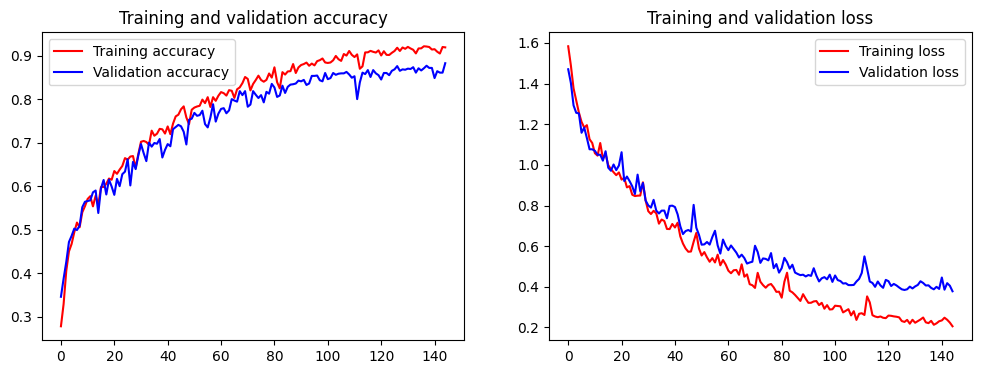

In [30]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

figure, axis = plt.subplots(1, 2, figsize=(12, 4))

axis[0].plot(epochs, acc, 'r', label='Training accuracy')
axis[0].plot(epochs, val_acc, 'b', label='Validation accuracy')
axis[0].set_title("Training and validation accuracy")
axis[0].legend(loc=0)

axis[1].plot(epochs, loss, 'r', label='Training loss')
axis[1].plot(epochs, val_loss, 'b', label='Validation loss')
axis[1].set_title("Training and validation loss")
axis[1].legend(loc=0)


plt.show()

In [31]:
model.save('scalp_model.h5')

In [35]:
%cd /content/machine-learning/Dataset/Dataset-Image-Augmented

/content/machine-learning/Dataset/Dataset-Image-Augmented


In [40]:
!zip -r Dataset-Image-Augmented.zip  /content/machine-learning/Dataset/Dataset-Image-Augmented

Streaming output truncated to the last 5000 lines.
  adding: content/machine-learning/Dataset/Dataset-Image-Augmented/normal/normal_original_Frame00702-org.jpg_63a52e5c-922d-48e4-bc43-4394643b3c69.jpg (deflated 2%)
  adding: content/machine-learning/Dataset/Dataset-Image-Augmented/normal/normal_original_Frame00502-org.jpg_864cda5a-e746-4630-ac1f-1962a7fb95a3.jpg (deflated 0%)
  adding: content/machine-learning/Dataset/Dataset-Image-Augmented/normal/normal_original_Frame00771-org.jpg_e506f17d-4e29-41de-a7d7-7179b64725fe.jpg (deflated 1%)
  adding: content/machine-learning/Dataset/Dataset-Image-Augmented/normal/normal_original_Frame00963-org.jpg_c4c15063-d320-477f-bade-bda9a544f12e.jpg (deflated 2%)
  adding: content/machine-learning/Dataset/Dataset-Image-Augmented/normal/normal_original_Frame00336-org.jpg_69e997c3-0b84-4e1a-bedd-45d86aa06f1e.jpg (deflated 0%)
  adding: content/machine-learning/Dataset/Dataset-Image-Augmented/normal/normal_original_Frame00397-org.jpg_df27ea40-189d-429b-b

In [41]:
%cd /content/machine-learning/Dataset/Dataset-Image-Used

/content/machine-learning/Dataset/Dataset-Image-Used


In [42]:
!zip -r Dataset-Image-Augmented.zip  /content/machine-learning/Dataset/Dataset-Image-Used

Streaming output truncated to the last 5000 lines.
  adding: content/machine-learning/Dataset/Dataset-Image-Used/test/seborrhoeic-dermatitis/seborrhoeic-dermatitis_original_seborrhoiec-dermatitis-31.jpg_3d57cfe4-98a9-4e17-96ed-7be8011ad94b.jpg (deflated 2%)
  adding: content/machine-learning/Dataset/Dataset-Image-Used/test/seborrhoeic-dermatitis/seborrhoeic-dermatitis_original_seborrhoiec-dermatitis-21.jpg_8df63d65-c796-4ec3-b68c-7e4c68a4e771.jpg (deflated 3%)
  adding: content/machine-learning/Dataset/Dataset-Image-Used/test/seborrhoeic-dermatitis/seborrhoeic-dermatitis_original_seborrhoiec-dermatitis-21.jpg_39ecc05c-7ccb-4a65-b2c9-5e9668b0e881.jpg (deflated 4%)
  adding: content/machine-learning/Dataset/Dataset-Image-Used/test/seborrhoeic-dermatitis/seborrhoeic-dermatitis_original_seborrhoiec-dermatitis-12.jpg_7f17de7c-f25a-45a2-9975-3eb86cb6ede9.jpg (deflated 2%)
  adding: content/machine-learning/Dataset/Dataset-Image-Used/test/seborrhoeic-dermatitis/seborrhoeic-dermatitis_original

# Analysis-Purpose

In [32]:
import tensorflow as tf
from tensorflow.keras.saving import load_model

model = load_model("/content/scalp_model.h5")

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [44]:
TEST_DIR = test_dir

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    class_mode='categorical',
    batch_size=BATCH_SIZE
)

Found 1200 images belonging to 5 classes.


In [45]:
test_generator.class_indices

{'alopecia-areata': 0,
 'normal': 1,
 'scalp-psoriasis': 2,
 'seborrhoeic-dermatitis': 3,
 'tinea-capitis': 4}

In [46]:
import numpy as np

y_pred = model.predict(test_generator)

5/5 [==============================] - 2s 366ms/step


In [47]:
y_pred

array([[7.1049097e-04, 3.8028753e-04, 1.4329808e-03, 9.9747437e-01,
        1.8849778e-06],
       [8.6520339e-16, 1.0000000e+00, 6.8937378e-17, 7.9350956e-25,
        3.2137305e-27],
       [5.0160889e-02, 2.6651514e-05, 4.4541176e-02, 9.0526754e-01,
        3.7787952e-06],
       ...,
       [6.2850094e-01, 1.6635913e-02, 2.4208328e-01, 1.2049967e-02,
        1.0072986e-01],
       [1.9208921e-06, 3.3462886e-08, 3.5506644e-05, 1.0077320e-08,
        9.9996257e-01],
       [7.7310215e-05, 6.4381202e-05, 5.4075138e-04, 9.9931765e-01,
        3.3260264e-08]], dtype=float32)

In [48]:
y_class = np.argmax(y_pred, axis=1)

In [49]:
y_class

array([3, 1, 3, ..., 0, 4, 3])

In [50]:
unique_classes = os.listdir(destination_dir)
predicted_unique_classes = [unique_classes[idx] for idx in y_class]

In [51]:
print(predicted_unique_classes)

['tinea-capitis', 'Dataset-Image-Augmented.zip', 'tinea-capitis', 'alopecia-areata', 'alopecia-areata', 'Dataset-Image-Augmented.zip', 'Dataset-Image-Augmented.zip', 'Dataset-Image-Augmented.zip', 'alopecia-areata', 'tinea-capitis', 'tinea-capitis', 'normal', 'Dataset-Image-Augmented.zip', 'Dataset-Image-Augmented.zip', 'normal', 'tinea-capitis', 'alopecia-areata', 'Dataset-Image-Augmented.zip', 'alopecia-areata', 'Dataset-Image-Augmented.zip', 'normal', 'alopecia-areata', 'scalp-psoriasis', 'Dataset-Image-Augmented.zip', 'Dataset-Image-Augmented.zip', 'scalp-psoriasis', 'tinea-capitis', 'Dataset-Image-Augmented.zip', 'tinea-capitis', 'alopecia-areata', 'tinea-capitis', 'tinea-capitis', 'scalp-psoriasis', 'normal', 'Dataset-Image-Augmented.zip', 'scalp-psoriasis', 'Dataset-Image-Augmented.zip', 'normal', 'scalp-psoriasis', 'scalp-psoriasis', 'tinea-capitis', 'tinea-capitis', 'alopecia-areata', 'tinea-capitis', 'alopecia-areata', 'scalp-psoriasis', 'Dataset-Image-Augmented.zip', 'scalp-

# Deployment-Purpose

In [53]:
payload = {
    "image_1": "/content/machine-learning/Dataset/Dataset-Image-Used/test/alopecia-areata/alopecia-areata-0.jpg",
    "image_2": "/content/machine-learning/Dataset/Dataset-Image-Used/test/normal/Frame00006-org.jpg",
    "image_3": "/content/machine-learning/Dataset/Dataset-Image-Used/test/scalp-psoriasis/1373_psoriasis-scalp12.jpg",
    "image_4": "/content/machine-learning/Dataset/Dataset-Image-Used/test/seborrhoeic-dermatitis/seborrhoeic-dermatitis_original_seborrhoiec-dermatitis-0.jpg_10ec03b5-8e50-4d7c-bbe5-b5e0014e39ce.jpg",
    "image_5": "/content/machine-learning/Dataset/Dataset-Image-Used/test/tinea-capitis/tinea-capitis-10.jpg",
}

In [54]:
payload

{'image_1': '/content/machine-learning/Dataset/Dataset-Image-Used/test/alopecia-areata/alopecia-areata-0.jpg',
 'image_2': '/content/machine-learning/Dataset/Dataset-Image-Used/test/normal/Frame00006-org.jpg',
 'image_3': '/content/machine-learning/Dataset/Dataset-Image-Used/test/scalp-psoriasis/1373_psoriasis-scalp12.jpg',
 'image_4': '/content/machine-learning/Dataset/Dataset-Image-Used/test/seborrhoeic-dermatitis/seborrhoeic-dermatitis_original_seborrhoiec-dermatitis-0.jpg_10ec03b5-8e50-4d7c-bbe5-b5e0014e39ce.jpg',
 'image_5': '/content/machine-learning/Dataset/Dataset-Image-Used/test/tinea-capitis/tinea-capitis-10.jpg'}

In [55]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

all_confidence = {}
i = 1
#['normal', 'alopecia-areata', 'tinea-capitis', 'scalp-psoriasis', 'seborrhoeic-dermatitis']
disease_mapper = {
    0: 'alopecia-areata',
    1: 'normal',
    2:'scalp-psoriasis',
    3:'seborrhoeic-dermatitis',
    4:'tinea-capitis'}
for path in payload.values():
    img = load_img(path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
    img_array = img_to_array(img)
    img_array /= 255.0
    img_array = np.expand_dims(img_array, axis=0)

    y_pred_single = model.predict(img_array)
    y_pred_single_class = np.argmax(y_pred_single, axis=1)
    y_pred_single_value = np.max(y_pred_single)

    all_confidence[i] = {
        "label": disease_mapper[y_pred_single_class[0]],
        "value": y_pred_single_value
    }

    i += 1



1/1 [==============================] - 0s 19ms/step


In [56]:
all_confidence

{1: {'label': 'normal', 'value': 0.9225551},
 2: {'label': 'normal', 'value': 0.9921909},
 3: {'label': 'scalp-psoriasis', 'value': 0.99999225},
 4: {'label': 'seborrhoeic-dermatitis', 'value': 0.99280316},
 5: {'label': 'tinea-capitis', 'value': 0.9825262}}